$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Xvh}{\hat{\mathbf{X}}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Zvh}{\hat{\mathbf{Z}}}
\newcommand{\Ev}{\mathbf{E}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$


# Three-Layer Neural Network

Katherine Haynes  
September 24, 2019

For this assignment, we modify the two-layer neural network matrix equations and code from lecture notes to become a three-layer neural network, one with two hidden layers.  In the following diagram, you will be adding another layer on the left between in the inputs, $x$, and the show hiddden layer.

You must complete three steps.
1. Complete the matrix equations using latex notation in the markdown cell,
2. Implement the required functions in python.
3. Perform the described experiments.

## Network Diagram

<img src="3layerdiagram.jpeg" width="400">

## Matrix Equations

Here are the matrix equations for a network with one hidden layer.

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H &= \text{ number of units in hidden layer }\\
~\\
\Zv &= \tanh(\Xvh\, \Vv) \\
\Yv &= \Zvh\, \Wv\\
\Ev &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (\Tv_{n,k} - \Yv_{n,k})^2 \\
~\\
\nabla_\Yv E_{n,k} &= \frac{-2}{NK} (\Tv_{n,k} - \Yv_{n,k})\\
\delta_\Yv &= \frac{-2}{NK} (\Tv - \Yv)\\
\nabla_\Wv E &=  \underbrace{\underbrace{\Zvh^T}_{H+1\times N} \underbrace{\delta_\Yv}_{N\times K}}_{H+1\times K}\\
~\\
\nabla_\Vv E &= \underbrace{\underbrace{\Xvh^T}_{I+1\times N} \; \underbrace{\delta_\Zv}_{N\times H}}_{I+1\times H} \;\;\;\;\text{ where } \delta_\Zv = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv^2) \;\;\;\; \text{ if } f(\Xvh \Vv) = \tanh(\Xvh \Vv)\\
\end{align*}
$$

Now we replace $H$ with $H_1$ and $H_2$, and $\Zv$ with $\Zv_1$ and $\Zv_2$.  We also add another first layer of weights, $\Uv$, and we add the equation for $\nabla_\Uv E$.  Below are the resulting matrix equations for a network with two hidden layers.  Please not that the equations show the derivates for the tanh function.  If a different activation function is used, these equations will obviously have to be modified.

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H_1 &= \text{ number of units in first hidden layer }\\
H_2 &= \text{ number of units in second hidden layer }\\
~\\
\Zv_1 &= \tanh(\Xvh\, \Uv) \\
\Zv_2 &= \tanh(\Zvh_1\, \Vv) \\
\Yv &= \Zvh_2\, \Wv\\
~\\
\nabla_\Yv E &= \delta_\Yv = \frac{-2}{NK} (\Tv - \Yv) \\
\nabla_\Wv E &=  \underbrace{\underbrace{\Zvh_2^T}_{H_2+1\times N} \underbrace{\delta_\Yv}_{N\times K}}_{H_2+1\times K}\\
~\\
\delta_{\Zv2} &= (\delta_\Yv \Wv_{1:}^T) \cdot (1-\Zv_2^2) \\
\nabla_\Vv E &= \underbrace{\underbrace{\Zvh_1^T}_{H_1+1\times N} \; \underbrace{\delta_{\Zv2}}_{N\times H_2}}_{H_1+1\times H_2} \\
~\\
\delta_{\Zv1} &= (\delta_{\Zv2} \Vv_{1:}^T) \cdot (1-\Zv_1^2) \\
\nabla_\Uv E &= \underbrace{\underbrace{\Xvh^T}_{I+1\times N} \; \underbrace{\delta_{\Zv1}}_{N\times H_1}}_{I+1\times H_1} \\
\end{align*}
$$


## Code

The functions `network` `error_gradient` and `mse` do the compuations for a three-layer neural network.  
They have the following arguments:
* `Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=False)`
or
* `Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)`
* `gradient = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`
* `mean_squared_error = mse(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`

In [2]:
def network(w, n_inputs, n_hiddens_1, n_hiddens_2,
            n_outputs, X, all_outputs=False):
    n_U = (n_inputs + 1) * n_hiddens_1
    n_V = (n_hiddens_1 + 1) * n_hiddens_2
    n_W = (n_hiddens_2 + 1) * n_outputs
    
    U = w[:n_U].reshape((n_inputs+1,n_hiddens_1))
    V = w[n_U:(n_U+n_V)].reshape(n_hiddens_1+1,n_hiddens_2)
    W = w[(n_U+n_V):].reshape(n_hiddens_2+1,n_outputs)
    
    Z1 = np.tanh(U[0:1, :] + X @ U[1:, :])
    Z2 = np.tanh(V[0:1, :] + Z1 @ V[1:, :])
    Y = W[0:1, :] + Z2 @ W[1:, :]
    return (Y, Z1, Z2) if all_outputs else Y

def error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2,
                   n_outputs, X, T):
    Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2,
                        n_outputs, X, all_outputs=True)
    n_U = (n_inputs + 1) * n_hiddens_1
    n_V = (n_hiddens_1 + 1) * n_hiddens_2
    n_W = (n_hiddens_2 + 1) * n_outputs
    n_samples = X.shape[0]

    delta_Y = -2 / (n_samples * n_outputs) * (T - Y)
    Z2_hat = np.insert(Z2, 0, 1, axis=1)
    dEdW = Z2_hat.T @ delta_Y

    W = w[(n_U+n_V):].reshape(n_hiddens_2+1,n_outputs)
    delta_Z2 = (delta_Y @ W[1:,:].T) * (1 - Z2**2)
    Z1_hat = np.insert(Z1, 0, 1, axis=1)
    dEdV = Z1_hat.T @ delta_Z2

    V = w[n_U:(n_U+n_V)].reshape(n_hiddens_1+1,n_hiddens_2)
    delta_Z1 = (delta_Z2 @ V[1:,:].T) * (1 - Z1**2)
    X_hat = np.insert(X, 0, 1, axis=1)
    dEdU = X_hat.T @ delta_Z1

    dEdw = np.hstack((dEdU.flatten(), dEdV.flatten(), dEdW.flatten()))
    return dEdw

def mse(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T):
    Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
    return np.mean((T-Y)**2)

## Test on Air Quality Data
Predict CO from the Hour of the day.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas
import optimizers as opt  # in optimizers.py

In [5]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
print('data.shape =', data.shape)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

data.shape = (443, 2)


array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]])

Define the network parameters.  
Use the shapes of `X` and `T` to assign the number of inputs and outputs.  
Define each of the two hidden layers to have 5 units.

In [6]:
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]

Now we must define the intial weight vector.  The vector contains a value for each weight in all three layers.

In [7]:
n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

Before training our network, standardize the input values, to change the hour to have zero mean and unit variance across the set of samples.  Change `True` to `False` to not perform this step, allowing you to compare results with and without standardization.  It is not required to show the results here.  When you check in your notebook, leave `standardize` set to `True`.

In [8]:
standardize = True

if standardize:
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    
    X = (X - X_mean) / X_std
    
print(f'X mean is {X.mean(axis=0)[0]:.3f} and its standard deviation is {X.std(axis=0)[0]:.3f}')

X mean is 0.000 and its standard deviation is 1.000


Now we can train our network using each of our three optimization algorithms.

In [9]:
n_iterations = 2000

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 1.154 and it took 0.63 seconds
Adam final error is 1.231 and it took 0.71 seconds
SCG final error is 0.912 and it took 1.34 seconds


Examine the error curve and the model fits for each of the optimization algorithms.

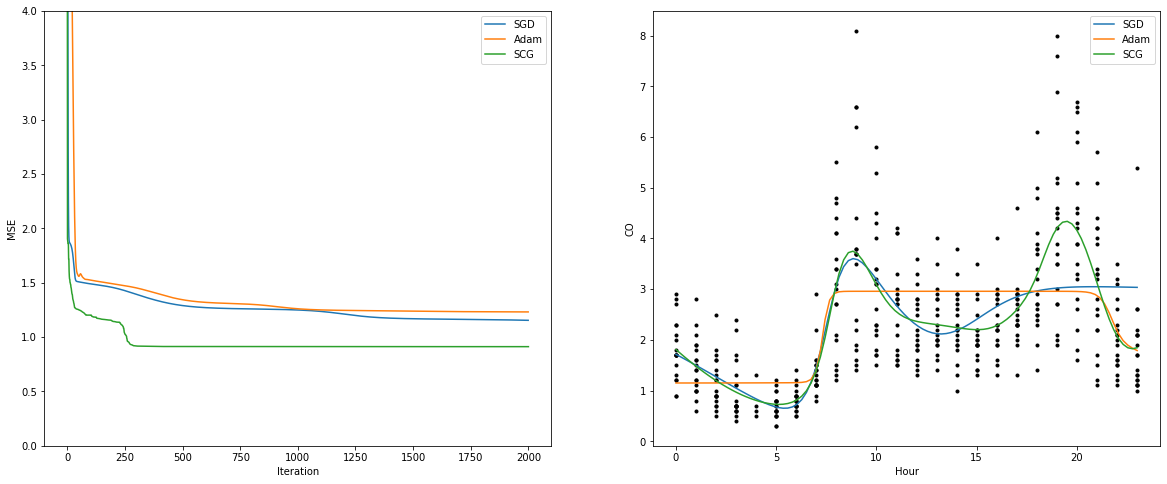

In [10]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(result_sgd['ftrace'], label='SGD')
plt.plot(result_adam['ftrace'], label='Adam')
plt.plot(result_scg['ftrace'], label='SCG')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0, 4)

plt.subplot(1, 2, 2)
if standardize:
    plt.plot(X * X_std + X_mean, T, 'k.')  # unstandardize X
else:
    plt.plot(X, T, 'k.')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
xs_standardized = (xs - X_mean) / X_std if standardize else xs
plt.plot(xs, network(result_sgd['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SGD')
plt.plot(xs, network(result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='Adam')
plt.plot(xs, network(result_scg['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SCG')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('CO');

Looking at the MSE plot, it looks like the MSE for SCG drops the lowest the fastest, where it then remains constant beyond 250 iterations.  Both SGD and Adam continue to decrease as the iterations continue; however, Adam's rate of decrease lowers at the number of iterations increases, indicating it is not benefitting beyond ~1000 iterations.

Looking at the CO emissions, SCG captures the bimodal diurnal cycle, with peaks in emissions during the morning and evening rush hours.  The Adam algorithm does not capture either peak, and instead has two different values, one lower at night and one higher during the daytime.  As seen in the line above, this causes a higher MSE compared to SCG.  SGD appears to be a comprimise between the two in this example, capturing the morning rush hour similar to SGD, but not the evening rush hour.  Compared to SCG with two distinct peaks in emissions, SGD increases the emissions throughout the afternoon, but then holds the rate relatively constant through the early evening into night when it slowly decreases.

**Parameter Search:** Try different values for key parameters of `n_iterations`, `n_hiddens_1`, `n_hiddens_2` and `learning_rate`.

In [11]:
results = []
for n_iterations in [500, 1000]:
    for nh1 in [30, 50, 80]:
        for nh2 in [30, 50, 80]:
            
            n_U = (n_inputs + 1) * nh1
            n_V = (nh1 + 1) * nh2
            n_W = (nh2 + 1) * n_outputs
            initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)

            result_scg = opt.scg(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                 n_iterations=n_iterations)
            results.append([n_iterations, nh1, nh2, 0, 'scg', result_scg['ftrace'][-1]])
            
            for lr in [1e-1, 1e-3]:
                
                result_sgd = opt.sgd(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=lr, momentum_rate=0)
                result_adam = opt.adam(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                       n_iterations=n_iterations, learning_rate=lr)
 
                results.append([n_iterations, nh1, nh2, lr, 'sgd', result_sgd['ftrace'][-1]])
                results.append([n_iterations, nh1, nh2, lr, 'adam', result_adam['ftrace'][-1]])

results = pandas.DataFrame(results, columns=('Iterations', 'nh1', 'nh2', 'lr', 'algo', 'mse'))
print("Finished Testing")

Finished Testing


**Results:** Show the results for the 20 lowest MSE values, sorted by increasing MSE.

In [12]:
(results.sort_values(by=['mse'])).head(20)

Iterations  nh1  nh2   lr  algo       mse
22         500   50   50  0.1  adam  0.909662
57        1000   30   80  0.1  adam  0.909676
60        1000   50   30  0.0   scg  0.909734
45        1000   30   30  0.0   scg  0.909737
80        1000   80   50  0.0   scg  0.909755
75        1000   80   30  0.0   scg  0.909778
85        1000   80   80  0.0   scg  0.910071
65        1000   50   50  0.0   scg  0.910136
30         500   80   30  0.0   scg  0.910190
47        1000   30   30  0.1  adam  0.910232
15         500   50   30  0.0   scg  0.910243
72        1000   50   80  0.1  adam  0.910258
70        1000   50   80  0.0   scg  0.910486
7          500   30   50  0.1  adam  0.911236
35         500   80   50  0.0   scg  0.911332
20         500   50   50  0.0   scg  0.911410
50        1000   30   50  0.0   scg  0.911764
27         500   50   80  0.1  adam  0.911781
37         500   80   50  0.1  adam  0.911940
2          500   30   30  0.1  adam  0.911995

From doing these experiments, Adam and SCG have the lowest MSE values across tests.  The MSE does not appear to lower significantly with an incease in iterations from 1000 to 5000 (done on my own, 2000 here), indicating the time to do the extra iterations may not be worth the decrease in error.  In fact, it surprised me that SCG had lower MSE for more iterations, as this was contrary to what what shown above in the CO example.  In looking further into this, it appears that the error does continue to lower slightly for SCG; however, the time taken is likely not worth the improvement in performance.

Increasing the number of units in each hidden layer beyond 50 did not seem to improve the results.  Interestingly, the results seem to indicate that the number of units per hidden layer does not need to be the same, and in fact the errors may be lower by using different numbers of units in each hidden layer, with the number of units as low as 10 still performing well.  The best learning rate was the largest, of 0.1 (for Adam).

I tried several different combinations to get the SGD algorithm to perform as well as Adam and SCG.  The more iterations I tried, the better the SGD performance.  With 6000 iterations, 50 and 30 units for the hidden layers, and a learning rate of 0.1, SGD had an MSE of 0.913, not too far below SCG (at 0.910) with the same setup.  Adam had a lower MSE at 6000 iterations, but with a learning rate of 1.e-3.  With the 0.1 learning rate, where SGD appears to perform the best, Adam had a higher MSE of 1.26.  With 10000 iterations, SGD no longer improved and still had an MSE of 0.913.  SCG also remained unchanged at 0.910, and Adam increased its MSE to 1.58 (using a 0.1 learning rate).

Since you have cleverly written your code to handle any value of $I$, $H_1$, $H_2$, and $K$, your code should be able to handle the following data that contains three attributes for each of 5 samples and two output values for each sample.

In [13]:
X = np.arange(15).reshape((5, 3))
T = np.hstack((X[:, 0:1] * 0.1 * X[:, 1:2], X[:, 2:]**2)) # making two target values for each sample
T = T.reshape((5, 2))
print('  Input            Target')
for x, t in zip(X, T):
    print(x, '\t', t)

  Input            Target
[0 1 2] 	 [0. 4.]
[3 4 5] 	 [ 1.2 25. ]
[6 7 8] 	 [ 4.2 64. ]
[ 9 10 11] 	 [  9. 121.]
[12 13 14] 	 [ 15.6 196. ]


Let's use your code to train a neural network with two hidden layers, having 50 units in the first hidden layer and 3 units in the second hidden layer.  This example does not perform the standardization step.

In [14]:
n_hiddens_1 = 50
n_hiddens_2 = 3  #30
n_iterations = 1200  #2000


n_inputs = X.shape[1]
n_outputs = T.shape[1]

n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 2433.744 and it took 0.23 seconds
Adam final error is 3044.076 and it took 0.21 seconds
SCG final error is 83.433 and it took 0.35 seconds


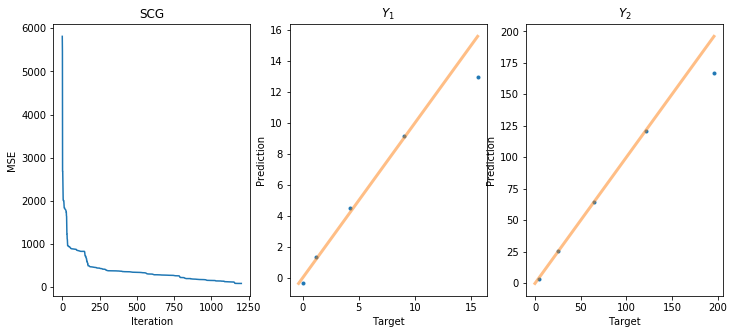

In [15]:
def plot_diagonal(T, Y):
    a = min(T.min(), Y.min())
    b = max(T.max(), Y.max())
    plt.plot([a, b], [a, b], '-', lw=3, alpha=0.5)

plotallfits = False
if (plotallfits):
    plt.figure(figsize=(12, 10))
    w = result_sgd['w']
    Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
    plt.subplot(2, 3, 1)
    plt.plot(result_sgd['ftrace'])
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('SGD')

    plt.subplot(2, 3, 2)
    plt.plot(T[:, 0], Y[:, 0], '.')
    plot_diagonal(T[:, 0], Y[:, 0])
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.title('$Y_1$')

    plt.subplot(2, 3, 3)
    plt.plot(T[:, 1], Y[:, 1], '.')
    plot_diagonal(T[:, 1], Y[: 1])
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.title('$Y_2$');

    w = result_adam['w']
    Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
    plt.subplot(2, 3, 4)
    plt.plot(result_adam['ftrace'])
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('Adam')

    plt.subplot(2, 3, 5)
    plt.plot(T[:, 0], Y[:, 0], '.')
    plot_diagonal(T[:, 0], Y[:, 0])
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.title('$Y_1$')

    plt.subplot(2, 3, 6)
    plt.plot(T[:, 1], Y[:, 1], '.')
    plot_diagonal(T[:, 1], Y[: 1])
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.title('$Y_2$');

plt.figure(figsize=(12, 5))
w = result_scg['w']
Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
plt.subplot(1, 3, 1)
plt.plot(result_scg['ftrace'])
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('SCG')

plt.subplot(1, 3, 2)
plt.plot(T[:, 0], Y[:, 0], '.')
plot_diagonal(T[:, 0], Y[:, 0])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_1$')

plt.subplot(1, 3, 3)
plt.plot(T[:, 1], Y[:, 1], '.')
plot_diagonal(T[:, 1], Y[: 1])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_2$');

These plots show the MSE for SCG (left) and the target versus predicted values along with the 1:1 line for the two variables being predicted (Y1, middle and Y2, right).  I found these plots to be sensitive to when I ran this cell in the notebook, but in general the SCG predicted the target well, with the points generally lying on the 1:1 line.  Both Y1 and Y2 appear to be linear, with the Y2 output having a much larger range with a maximum ~200, whereas Y1 has a maximum of ~16.  

The SCG algorithm appears to capture both Y1 and Y2 reasonably well, as shown in the scatter plots.  The point that seems the most difficult to capture was the last data point with the highest value.  I found the SCG algorithm tended to underestimate this value compared to the observed value (below the 1:1 line).  Occasionally this was offset by an overestimation of the first data point (above 1:1 line near zero).  The fact that the MSE is low and the scatter plots look reasonable attests to the setup of our matrix equations in being able to predict two variables correctly.  

I noticed that the SCG algorigthm had a much lower MSE than the other two (SGD and Adam), although it did take longer.  This could be due to the lower number of hidden weights or to those algorithms needing more iterations to properly converge.  When I increased the units in the second hidden layer to 30 and used 2000 iterations, the MSE for SGD (1.67) and Adam (1.43) were comparable to SCG (1.51).  As is (second hidden layer of 3 units with 1000 iterations), both SGD and Adam are unable to fit the targets, instead staying at constant mid-range values.

## Explanatory Figures

Train a neural network with two hidden layers with five units in each layer to predict CO from the Hour of the day.  After it is trained plot the outputs of the five units in the first hidden layer versus 100 floating point values of hour from 0 to 23 in one subplot of one figure.  Then, in another subplot plot the outputs of the five units in the second hidden layer.  In a third subplot, plot the predicted CO from the output of the neural network.  Arrange the subplots vertically.

SGD final error is 1.650 and it took 5.61 seconds
Adam final error is 1.447 and it took 5.56 seconds
SCG final error is 1.435 and it took 11.61 seconds


Text(0, 0.5, 'CO')

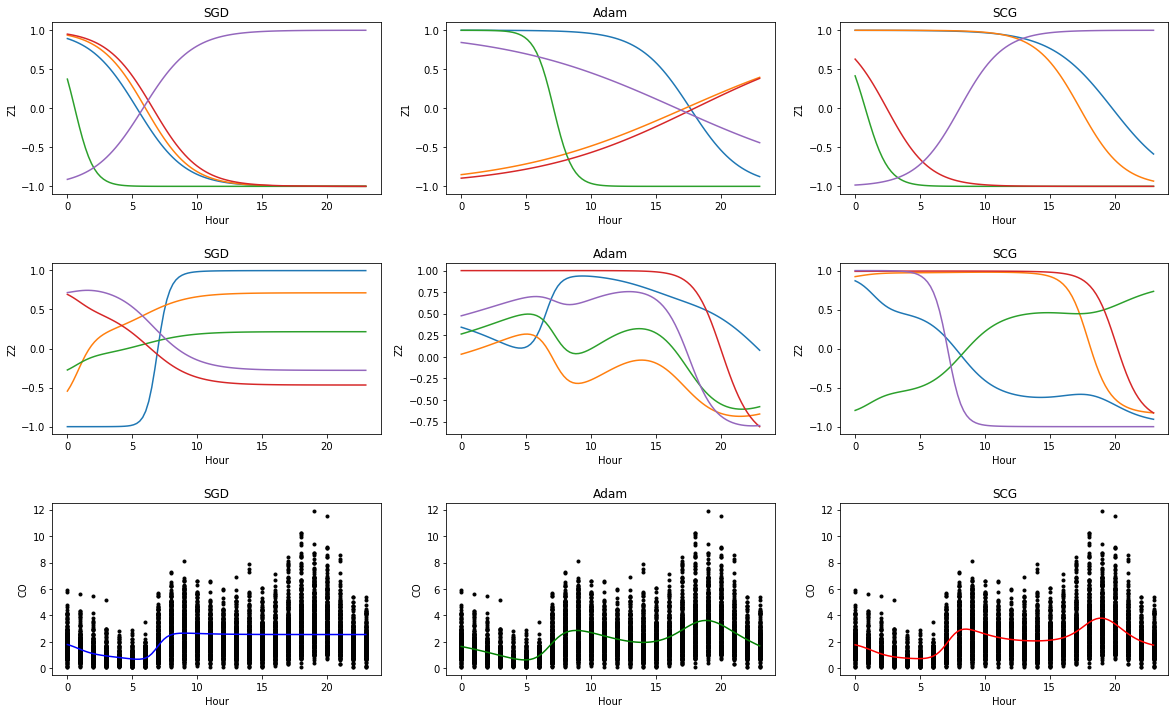

In [17]:
# Re-read the CO data
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data.dropna(axis=0)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)

# Setup the neural network
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]

n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs
initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

# Train the neural networks
n_iterations = 2000
result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')
      
# Plot the results
plt.figure(figsize=(20, 12))
xs = np.linspace(0,23,100).reshape((-1,1))
SGDY, SGDZ1, SGDZ2 = network(result_sgd['w'], n_inputs, n_hiddens_1, n_hiddens_2,
                        n_outputs, xs, all_outputs=True)
SCGY, SCGZ1, SCGZ2 = network(result_scg['w'], n_inputs, n_hiddens_1, n_hiddens_2,
                        n_outputs, xs, all_outputs=True)
AdamY, AdamZ1, AdamZ2 = network(result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2,
                        n_outputs, xs, all_outputs=True)

plt.subplot(3,3,1)
plt.plot(xs,SGDZ1[:,0])
plt.plot(xs,SGDZ1[:,1])
plt.plot(xs,SGDZ1[:,2])
plt.plot(xs,SGDZ1[:,3])
plt.plot(xs,SGDZ1[:,4])
plt.title('SGD')
plt.xlabel('Hour')
plt.ylabel('Z1')

plt.subplot(3,3,2)
plt.plot(xs,AdamZ1[:,0])
plt.plot(xs,AdamZ1[:,1])
plt.plot(xs,AdamZ1[:,2])
plt.plot(xs,AdamZ1[:,3])
plt.plot(xs,AdamZ1[:,4])
plt.title('Adam')
plt.xlabel('Hour')
plt.ylabel('Z1')
      
plt.subplot(3,3,3)
plt.plot(xs,SCGZ1[:,0])
plt.plot(xs,SCGZ1[:,1])
plt.plot(xs,SCGZ1[:,2])
plt.plot(xs,SCGZ1[:,3])
plt.plot(xs,SCGZ1[:,4])
plt.title('SCG')
plt.xlabel('Hour')
plt.ylabel('Z1')
      
plt.subplot(3,3,4)
plt.plot(xs,SGDZ2[:,0])
plt.plot(xs,SGDZ2[:,1])
plt.plot(xs,SGDZ2[:,2])
plt.plot(xs,SGDZ2[:,3])
plt.plot(xs,SGDZ2[:,4])
plt.title('SGD')
plt.xlabel('Hour')
plt.ylabel('Z2')
plt.subplots_adjust(hspace=0.4,wspace=0.2)
      
plt.subplot(3,3,5)
plt.plot(xs,AdamZ2[:,0])
plt.plot(xs,AdamZ2[:,1])
plt.plot(xs,AdamZ2[:,2])
plt.plot(xs,AdamZ2[:,3])
plt.plot(xs,AdamZ2[:,4])
plt.title('Adam')
plt.xlabel('Hour')
plt.ylabel('Z2')
plt.subplots_adjust(hspace=0.4,wspace=0.2)
      
plt.subplot(3,3,6)
plt.plot(xs,SCGZ2[:,0])
plt.plot(xs,SCGZ2[:,1])
plt.plot(xs,SCGZ2[:,2])
plt.plot(xs,SCGZ2[:,3])
plt.plot(xs,SCGZ2[:,4])
plt.title('SCG')
plt.xlabel('Hour')
plt.ylabel('Z2')
plt.subplots_adjust(hspace=0.4,wspace=0.2)
      
plt.subplot(3,3,7)
plt.plot(X, T, 'k.')
plt.plot(xs, SGDY, 'b')
plt.title('SGD')
plt.xlabel('Hour')
plt.ylabel('CO')
      
plt.subplot(3,3,8)
plt.plot(X, T, 'k.')
plt.plot(xs, AdamY, 'g')
plt.title('Adam')
plt.xlabel('Hour')
plt.ylabel('CO')
      
plt.subplot(3,3,9)
plt.plot(X, T, 'k.')
plt.plot(xs, SCGY, 'r')
plt.title('SCG')
plt.xlabel('Hour')
plt.ylabel('CO')

Top Row) Output of the five units in the first hidden layer (Z1) for the SGD (left), Adam (middle), and SCG (right) algorithms, where each color represents a unit.  
Middle Row) Output of the five units in the second hidden layer (Z2) for the SGD (left), Adam (middle), and SCG (right) algorithms.
Bottom Row) Observed CO concentrations by hour (black dots) and modeled fit (colored lines) for SGD (blue, left), Adam (green, middle), and SCG (red, right).

Showing the weight outputs from each hidden layer gives us a perspective of how the overall fit is obtained and shows us differences between the algorithms.  In general, the weights from the first hidden layer are similar between the different algorithms, showing a general decrease from 1 to -1 with increasing hour.  In contrast, the weights from the second hidden layer are quite different between algorithms.  For SGD, we see the weights remain constant after hour 10, resulting in the constant predicted CO for the second half of the day.  The weights for Adam are quite different, and we can get an idea from their shapes how they convolve to the overall fit capturing the peak in CO for morning rush hour.  The weight outputs are quite different for SCG again, as we see two of the weights have big changes in the second half of the day.  These weights from the second hidden layer, combined with the different rates of decrease in the first hidden layer units leads to the SCG algorithm predicting the dual peaks of CO emissions during the morning and evening rush hours.